<a href="https://colab.research.google.com/github/mfernandasilvestre/ImersaoDados/blob/main/Desafios_Dia01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMERSÃO DADOS | ALURA**
**Aula1:** Análise de dados, python, pandas e novos fármacos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

---
---

###**DESAFIO 01** 
*Investigar por que a classe tratamento é tão desbalanceada*



Para realizar essa análise, primeiramente identificamos quais são os tipos de resposta possíveis para a classe **tratamento**:

In [ ]:
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

Sabendo que o tratamento pode ser **com droga** ou **com controle**, podemos identificar a porcentagem a qual cada um se refere:

<BarContainer object of 2 artists>

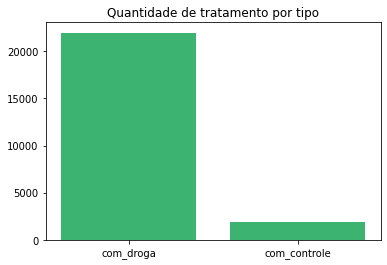

In [ ]:
dados['tratamento'].value_counts()

plt.title('Quantidade de tratamento por tipo')
labels = dados['tratamento'].unique()


plt.bar(dados['tratamento'].unique(), percentualTratamento, color='#3CB371', align='center')

As **drogas mais frequentes** são:

Text(0.5, 0, 'quantidade')

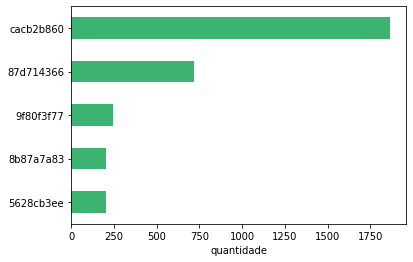

In [ ]:
drogasFrequentes = dados['droga'].value_counts().head(5)

drogasFrequentes.plot.barh(color = '#3CB371')

plt.gca().invert_yaxis()
plt.xlabel('quantidade')

---
---

###**DESAFIO 02** 
*Plotar as 5 últimas linhas da tabela*

Para plotar as 5 últimas linhas da nossa tabela de dados utilizamos o comando ***tail()*** que funciona como o ***head()*** apresentado em aula, porém apresenta as 5 últimas linhas no lugar das 5 primeiras:

In [ ]:
dados.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


---
---

###**DESAFIO 03** 
*Proporção das classes tratamento*

Podemos descobrir a proporção das classes de tratamento normalizando essa coluna:

In [ ]:
dados['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Isso significa que cerca de **92,2%** do tratamento é realizado **com droga** e que os outros **7,84%** é realizado com **controle**

([<matplotlib.patches.Wedge at 0x7fe0452c4490>,
 [Text(-1.0998655924188643, -0.01719530788037162, 'com_droga'),
  Text(1.2998411551525035, 0.020321697070005623, 'com_controle')],
 [Text(-0.5999266867739259, -0.009379258843839064, '92%'),
  Text(0.7999022493246176, 0.012505659735388076, '8%')])

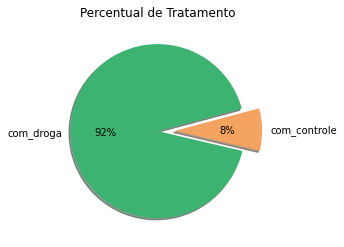

In [ ]:
tipoTratamento = dados['tratamento'].value_counts()

plt.title('Percentual de Tratamento', )
labels = dados['tratamento'].unique()
explode = (0, 0.2)
colors = ['#3CB371', '#F4A460']

plt.pie(tipoTratamento, labels=labels, colors=colors, explode=explode, autopct='%1.f%%', shadow=True, startangle=15)


---
---

###**DESAFIO 04** 
*Quantas tipos de drogas foram investigados*

Com o comando **.nunique()** podemos retornar o valor absoluto do número de drogas diferentes que estão presentes nos nossos dados

In [ ]:
dados['droga'].nunique()

3289

Assim, sabemos que foram utilizadas **3289 drogas diferentes** 

---
---

###**DESAFIO 06** 
*Renomear as colunas tirando o hífen*

Iremos realizar o  desafio 6 antes do 5, pois o método query pode apresentar erros ao utilizar nome de colunas com hífen.

Utilizamos o comando **.columns** para se referir as colunas do nosso DataFrame e então o comando **.str.replace()** para substituir todos os hífens por outro parâmetro. Aqui, apenas retiramos o hífen das colunas.

Referência:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html

In [ ]:
dados.columns = dados.columns.str.replace("-", "")
dados.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


---
---

###**DESAFIO 05** 
*Procurar na documentação o método query(pandas)*

De acordo com a documentação, utilizo **.query()** para determinar um filtro específico. Abaixo o método query está retornando apenas as linhas em que **o valor de g0 é 1 < g0 <2**

*Documentação:*
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

In [ ]:
dados.query('1 < g0 < 2')

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.062,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
39,id_0079d45d3,com_droga,24,D1,292ab2c28,1.631,-2.1430,-0.0943,-1.1990,0.4869,-0.0935,1.2090,-3.8910,-1.5450,-2.2870,-2.2040,-0.8888,-1.1730,0.0444,-3.9430,0.1673,-0.9502,-1.1750,0.1686,3.8480,-2.9760,-0.0389,1.6330,-0.0655,1.3810,-2.4340,-1.8040,0.3945,-1.2080,-0.1963,-2.0170,0.6004,-2.5860,-1.4550,-0.4141,...,-1.8210,-1.2440,-2.5430,-6.4260,-2.5320,-4.3570,-4.7560,-0.8781,-3.7800,-1.6340,-3.9660,-1.7890,-3.2480,-2.6720,-1.3250,-2.3430,-3.2220,-2.5160,-2.3410,-2.4620,-3.8760,-2.2450,-3.9450,-1.7400,-4.4320,-3.6740,-2.9810,-4.5770,-1.8620,-1.9120,-2.9240,-5.7720,-1.9360,-2.8860,-2.7680,-2.4840,-2.7020,-2.2530,-4.8360,-0.6461
59,id_00997a3a8,com_droga,72,D1,f30e9ac81,1.487,-0.0895,2.3640,-0.3717,0.1295,0.8296,0.5480,0.0022,-0.0461,0.5947,-0.0925,-1.2490,-0.1905,0.3319,0.2434,-1.5540,-0.8102,1.1940,-0.4978,1.0410,0.1247,-0.0297,-0.2991,0.0000,0.1455,0.8467,-0.5730,-0.5030,-0.0054,-0.4583,-0.1342,-0.3946,-0.0295,-1.1490,0.2578,...,-0.5747,-0.0643,0.1042,-0.4475,0.3853,-1.3940,-1.5260,-0.2141,0.6822,-0.6361,-0.2492,-0.1595,0.5199,0.1855,-0.4217,1.0120,-0.4573,-0.3602,-0.1107,-0.0387,-1.7380,0.6183,-0.4040,-0.2934,0.0011,0.0474,-0.1032,-0.1703,-0.4624,-1.8960,0.0521,0.1598,-1.5580,0.0028,0.0748,-0.3567,-0.2030,-0.1364,-0.7276,-0.1713
79,id_00d41e2da,com_droga,24,D1,5d9bb0ebe,1.532,-0.3059,0.4695,0.3089,0.1194,-0.1823,0.6715,-0.5972,-0.9615,-0.7833,-0.5148,0.3659,0.4707,0.2986,-0.3564,0.5778,-0.6789,-1.2290,0.3221,1.2850,-1.0950,-1.1990,0.8829,-0.9840,-0.0207,0.3465,0.1620,0.3408,-0.3893,0.6076,-0.4651,0.6652,0.4374,-1.3170,0.6507,...,-0.6531,-0.4443,-0.3244,0.7118,-0.3737,-1.4120,0.0086,-1.1380,-1.1140,-0.2520,-0.2088,-0.0139,-1.0080,-1.6350,-0.8094,0.0688,-0.4565,-0.4420,-1.5770,-1.3950,-1.0940,-0.7731,0.2040,-0.0943,-0.1459,-0.2328,-1.0320,-1.5620,0.1849,-1.1310,-1.2090,-0.4250,-2.1010,-1.3230,0.0104,-0.5390,-0.6585,-0.6532,-0.6599,-1.7470
96,id_010629f4f,com_controle,24,D2,cacb2b860,1.747,0.8486,-0.8951,-0.2527,0.8395,-1.8240,0.7343,1.4110,0.4115,-0.9278,-0.5775,0.1278,-0.0975,0.7462,0.1386,0.3019,0.2755,0.0077,-0.4307,-0.0614,-0.7026,0.6380,-0.4424,0.3336,1.0580,0.8181,-0.3120,-0.8434,-0.5082,-0.6232,-0.1182,0.0769,0.8822,-0.3924,0.0738,...,0.4028,-1.1310,-0.3188,-1.5920,-0.6571,-0.3516,-1.1960,0.3730,-0.1988,-0.5776,0.1406,-0.2491,0.1472,-0.2521,-1.6300,-0.0296,-0.1124,-0.4043,-2.0020,-0.9541,-0.5307,-0.2454,-0.7794,-0.1832,-0.2220,0.0612,-0.1308,-1.1460,0.2972,-1.0410,0.1143,-1.4060,-1.0940,0.3996,-0.2615,1.4650,-1.2790,-0.0619,0.5689,0.0263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23732,id_ff24fc052,com_droga,72,D2,b0c582a9c,1.021,-0.9212,-3.0220,-1.0340,0.1032,0.9606,1.1960,0.8860,-0.7537,0.8472,-0.5746,3.4520,-0.9130,-0.4212,-0.7200,0.1689,-0.1619,-3.4310,0.0336,0.3018,-0.2942,1.0460,-0.1854,-0.1161,-0.5339,0.0191,-0.5184,-0.7206,-0.487

Podemos fazer uma contagem para saber quantas linhas possuem o valor de g0 entre 1 e 2.

In [ ]:
dados.query('1 < g0 < 2').value_counts().sum()

1656

Então sabemos que temos **1656 valores de g0 entre 1 e 2**

---
---

###**DESAFIO 07** 
*Deixar os gráficos bonitões*

A biblioteca utilizada foi **matplotlib**

---
---

###**DESAFIO 08** 
*Resumo do que você aprendeu com os dados*



*   Importar um DataFrame;
*   Visualizar o tamanho de uma base;
*   Explorar dados;
*   Identificar o tipo de dado de cada coluna;
*   Trazer o resultado de apenas uma coluna;
*   Realizar uma contagem por agrupamento;
*   Normalizar dados e contagens;
*   Diferentes tipos de gráficos;
*   Plotar gráficos
*   Filtrar dados;
*   Apresentar primeiras/ultimas linhas;
*   Renomear colunas de um DataFrame;
*   Formatar gráficos;
